In [1]:
%matplotlib inline


# Plot individual and voting regression predictions


.. currentmodule:: sklearn

A voting regressor is an ensemble meta-estimator that fits several base
regressors, each on the whole dataset. Then it averages the individual
predictions to form a final prediction.
We will use three different regressors to predict the data:
:class:`~ensemble.GradientBoostingRegressor`,
:class:`~ensemble.RandomForestRegressor`, and
:class:`~linear_model.LinearRegression`).
Then the above 3 regressors will be used for the
:class:`~ensemble.VotingRegressor`.

Finally, we will plot the predictions made by all models for comparison.

We will work with the diabetes dataset which consists of 10 features
collected from a cohort of diabetes patients. The target is a quantitative
measure of disease progression one year after baseline.


In [2]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

Automatically created module for IPython interactive environment


Training classifiers
--------------------------------

First, we will load the diabetes dataset and initiate a gradient boosting
regressor, a random forest regressor and a linear regression. Next, we will
use the 3 regressors to build the voting regressor:



In [7]:
X, y = load_diabetes(return_X_y=True)

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(X, y)

(442, 10)

Making predictions
--------------------------------

Now we will use each of the regressors to make the 20 first predictions.



In [10]:
xt = X[:20]
print(xt.shape)
pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

(20, 10)


Plot the results
--------------------------------

Finally, we will visualize the 20 predictions. The red stars show the average
prediction made by :class:`~ensemble.VotingRegressor`.



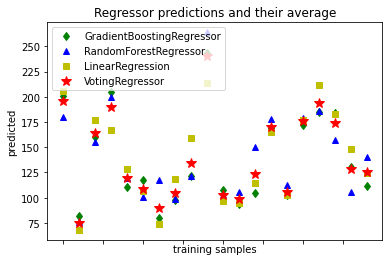

In [11]:
plt.figure()
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='LinearRegression')
plt.plot(pred4, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=True, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()